<a href="https://colab.research.google.com/github/ayatkatka/heart/blob/main/bitcoinDatasffffet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **هنا تم تعريف قاعده البينات التي تم اختيارها للمشروع و تم استخدام اكواد لفهم البيانات اكر **

In [ ]:
import pandas as pd
df=pd.read_csv('bitcoinDataset.csv')
print(df)
print(df.info())
print(df.shape)
print(df.describe())
print(df.head())
print(df.tail())
print(df.duplicated())
print(df.isnull())
print(df.dropna())
print(df.corr)
print(df.dtypes)
print(df.loc[0:9, ['Date','Closing Price (USD)']])



            Date  Open Price (USD)  High Price (USD)  Low Price (USD)  \
0     06/09/2023      25772.601560      25845.994140     25708.595700   
1     05/09/2023      25814.957030      25858.375000     25589.988280   
2     04/09/2023      25968.169920      26081.525390     25657.025390   
3     03/09/2023      25869.472660      26087.148440     25817.031250   
4     02/09/2023      25800.910160      25970.285160     25753.093750   
...          ...               ...               ...              ...   
3166  05/01/2015        265.084015        278.341003       265.084015   
3167  04/01/2015        281.145996        287.230011       257.612000   
3168  03/01/2015        314.846008        315.149994       281.082001   
3169  02/01/2015        314.079010        315.838989       313.565002   
3170  01/01/2015        320.434998        320.434998       314.002991   

      Closing Price (USD)  Adjusted Closing Price (USD)  Trading Volume  
0            25721.945310                  25721.

هنا تم اضافه اوتلاير

In [ ]:
# Exclude the 'Date' column when performing numerical comparisons for outlier detection
numerical_columns = bitcoin_df.select_dtypes(include=['float64', 'int64']).columns
Q1 = bitcoin_df[numerical_columns].quantile(0.25)
Q3 = bitcoin_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((bitcoin_df[numerical_columns] < (Q1 - 1.5 * IQR)) | (bitcoin_df[numerical_columns] > (Q3 + 1.5 * IQR))).any()

# Output the results
print('Outliers detected:\n', outliers)

Outliers detected:
 Open Price (USD)                True
High Price (USD)                True
Low Price (USD)                 True
Closing Price (USD)             True
Adjusted Closing Price (USD)    True
Trading Volume                  True
dtype: bool


هنا تم مقارنه بين trading volume and adj closing عن طريق سكاتار تشارت




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

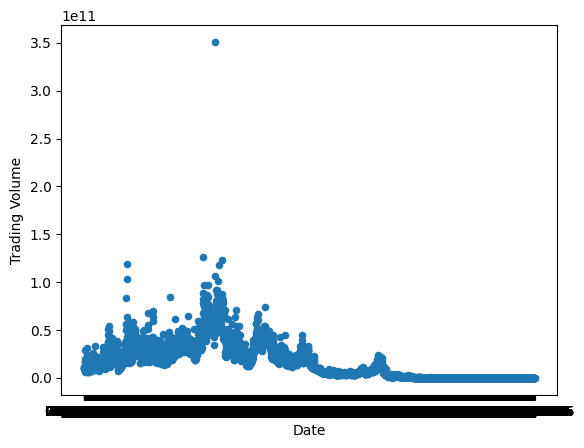

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('bitcoinDataset.csv')
df.isnull()
Df=df.dropna()
mean1=df['Trading Volume'].mean()
new_df=df.fillna(mean1, inplace=True)
df.plot(kind = 'scatter', x = 'Date', y = 'Trading Volume')
plt.show()

هنا تم اخراج العلاقه بين سعر بشكل عام بين كل الكولومز

In [ ]:
import pandas as pd
df=pd.read_csv('bitcoinDataset.csv')
print(df)
print(df.corr())


            Date  Open Price (USD)  High Price (USD)  Low Price (USD)  \
0     06/09/2023      25772.601560      25845.994140     25708.595700   
1     05/09/2023      25814.957030      25858.375000     25589.988280   
2     04/09/2023      25968.169920      26081.525390     25657.025390   
3     03/09/2023      25869.472660      26087.148440     25817.031250   
4     02/09/2023      25800.910160      25970.285160     25753.093750   
...          ...               ...               ...              ...   
3166  05/01/2015        265.084015        278.341003       265.084015   
3167  04/01/2015        281.145996        287.230011       257.612000   
3168  03/01/2015        314.846008        315.149994       281.082001   
3169  02/01/2015        314.079010        315.838989       313.565002   
3170  01/01/2015        320.434998        320.434998       314.002991   

      Closing Price (USD)  Adjusted Closing Price (USD)  Trading Volume  
0            25721.945310                  25721.

ValueError: could not convert string to float: '06/09/2023'

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Load the dataset
data = pd.read_csv("bitcoinDataset.csv")

# Define the target variable
target = "Closing Price (USD)"

# Select the features to evaluate
features = ["Open Price (USD)", "High Price (USD)", "Low Price (USD)", "Trading Volume"]

# Calculate the Gain Ratio for each feature
gain_ratios = mutual_info_classif(data[features], data[target], discrete_features=True)

# Print the Gain Ratio for each feature
for feature, gain_ratio in zip(features, gain_ratios):
    print(f"{feature}: {gain_ratio}")

ValueError: Unknown label type: 'continuous'

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('bitcoinDataset.csv')

df['Closing Price Category'] = pd.qcut(df['Closing Price (USD)'], 3, labels=['Low', 'Medium', 'High'])

le = LabelEncoder()
df['Closing Price Category Encoded'] = le.fit_transform(df['Closing Price Category'])

y = df['Closing Price Category Encoded']

mi = mutual_info_classif(df[['Closing Price (USD)']], y, discrete_features=False)

print('Mutual Information:', mi[0])

import numpy as np
entropy_y = -np.sum([p * np.log2(p) for p in np.bincount(y) / len(y) if p > 0])

print('Entropy of Target:', entropy_y)

gain_ratio = mi[0] / entropy_y
print('Gain Ratio:', gain_ratio)

Mutual Information: 1.097883652891662
Entropy of Target: 1.584962500721156
Gain Ratio: 0.6926874625690679


In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Load the stock data
data = pd.read_csv("bitcoinDataset.csv")

# Define the target variable
# Assuming 'Closing Price (USD)' needs to be discretized for mutual information calculation
# Discretizing the target variable into quartiles
data['Closing Price Category'] = pd.qcut(data['Closing Price (USD)'], 4, labels=False)

# Select the features to evaluate
features = ["Open Price (USD)", "High Price (USD)", "Low Price (USD)", "Trading Volume"]

# Calculate the Gain Ratio for each feature
# mutual_info_classif expects discrete features or the data to be binned
# Here, we are treating the features as continuous, hence setting discrete_features=False
GR = mutual_info_classif(data[features], data['Closing Price Category'], discrete_features=False)

# Select the features with the highest Gain Ratio (e.g., threshold of 0.5)
selected_features = [feature for feature, gr in zip(features, GR) if gr > 0.5]

# Print the selected features
print("Selected features:", selected_features)

Selected features: ['Open Price (USD)', 'High Price (USD)', 'Low Price (USD)', 'Trading Volume']


In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Load the dataset
bitcoin_df = pd.read_csv('bitcoinDataset.csv')

# Encode the target variable
le = LabelEncoder()
bitcoin_df['Closing Price (USD)'] = le.fit_transform(bitcoin_df['Closing Price (USD)'])

# Select numeric features and target variable
numeric_cols = bitcoin_df.select_dtypes(include=['float64', 'int64']).columns
X = bitcoin_df[numeric_cols].drop(['Closing Price (USD)'], axis=1)
y = bitcoin_df['Closing Price (USD)']

# Calculate Mutual Information
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame to display Mutual Information for each feature
mi_df = pd.DataFrame(mutual_info, index=X.columns, columns=['Mutual Information'])
mi_df.sort_values(by='Mutual Information', ascending=False, inplace=True)

print(mi_df)

                              Mutual Information
High Price (USD)                        0.950000
Low Price (USD)                         0.950000
Adjusted Closing Price (USD)            0.616667
Open Price (USD)                        0.283333
Trading Volume                          0.283333


هنا تم اخراج العلاقه بين سعر
open and closing


In [ ]:
import pandas as pd

file_path = 'bitcoinDataset.csv'
bitcoin_df = pd.read_csv(file_path)

corr = bitcoin_df['Date'].corr(bitcoin_df['Trading Volume'])

print('Correlation between Open and  Closing Price (USD):', corr)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
import pandas as pd

# Load the dataset
pd.read_csv("bitcoinDataset.csv")
pd.corr()

# Print the correlation matrix


AttributeError: module 'pandas' has no attribute 'corr'

هنا تم اخراج العلاقه بين سعر
high and low







In [ ]:
import pandas as pd

file_path = 'bitcoinDataset.csv'
bitcoin_df = pd.read_csv(file_path)

corr = bitcoin_df['High Price (USD)'].corr(bitcoin_df['Low Price (USD)'])

print('Correlation between High and  Low Price (USD):', corr)

Correlation between High and  Low Price (USD): 0.998941558724401


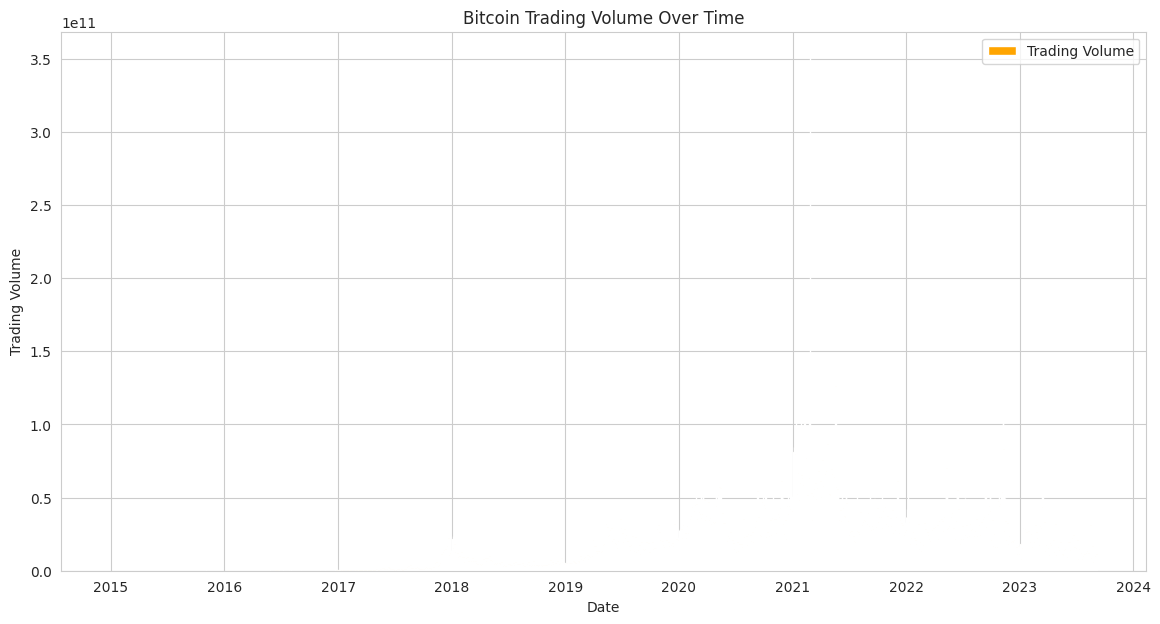

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'bitcoinDataset.csv'
bitcoin_df = pd.read_csv(file_path)

bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'], format='%d/%m/%Y')

bitcoin_df.sort_values('Date', inplace=True)

plt.figure(figsize=(14, 7))
plt.bar(bitcoin_df['Date'], bitcoin_df['Trading Volume'], label='Trading Volume', color='orange')
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.legend()
plt.show()

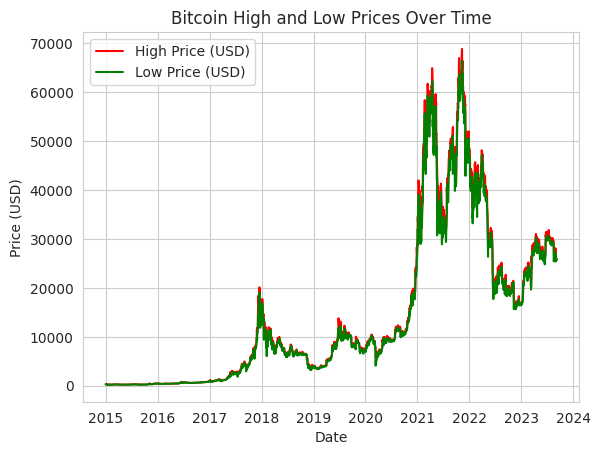

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'bitcoinDataset.csv'
bitcoin_df = pd.read_csv(file_path)

bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'], format='%d/%m/%Y')

bitcoin_df.sort_values('Date', inplace=True)

plt.plot(bitcoin_df['Date'], bitcoin_df['High Price (USD)'], label='High Price (USD)', color='red')
plt.plot(bitcoin_df['Date'], bitcoin_df['Low Price (USD)'], label='Low Price (USD)', color='green')
plt.title('Bitcoin High and Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

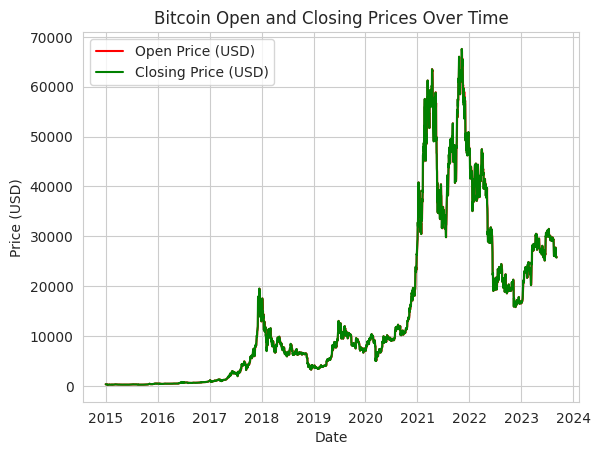

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'bitcoinDataset.csv'
bitcoin_df = pd.read_csv(file_path)

bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'], format='%d/%m/%Y')

bitcoin_df.sort_values('Date', inplace=True)

plt.plot(bitcoin_df['Date'], bitcoin_df['Open Price (USD)'], label='Open Price (USD)', color='red')
plt.plot(bitcoin_df['Date'], bitcoin_df['Closing Price (USD)'], label='Closing Price (USD)', color='green')
plt.title('Bitcoin Open and Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

<Axes: >

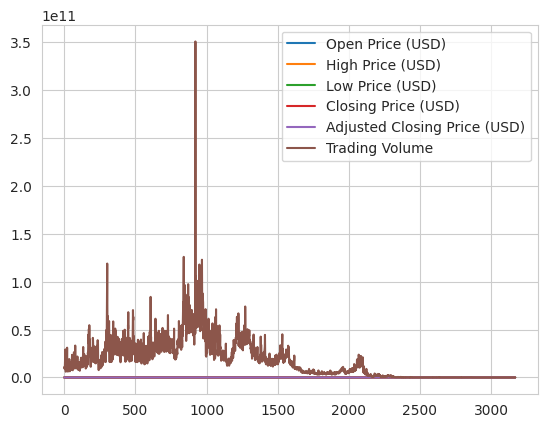

In [ ]:
df.plot()

Coefficients: 
 [1.]
Mean squared error: 0.00
Coefficient of determination: 1.00


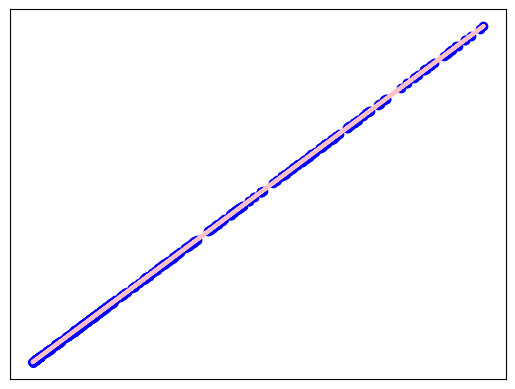

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

file_path = 'bitcoinDataset.csv'
bitcoin_df = pd.read_csv(file_path)

X = bitcoin_df[['Closing Price (USD)']]
y = bitcoin_df['Adjusted Closing Price (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regr = LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='pink', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

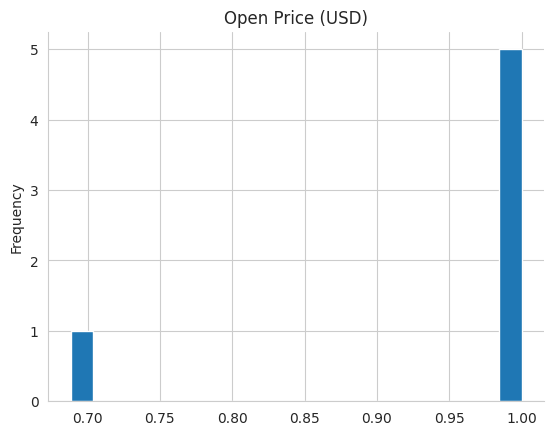

In [ ]:
from matplotlib import pyplot as plt
_df_0['Open Price (USD)'].plot(kind='hist', bins=20, title='Open Price (USD)')
plt.gca().spines[['top', 'right',]].set_visible(False)

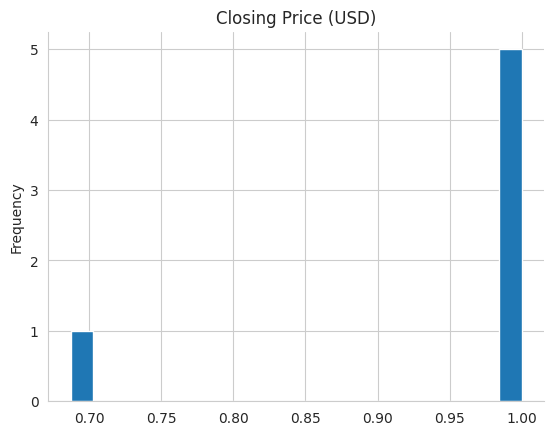

In [ ]:
from matplotlib import pyplot as plt
_df_0['Closing Price (USD)'].plot(kind='hist', bins=20, title='Closing Price (USD)')
plt.gca().spines[['top', 'right',]].set_visible(False)

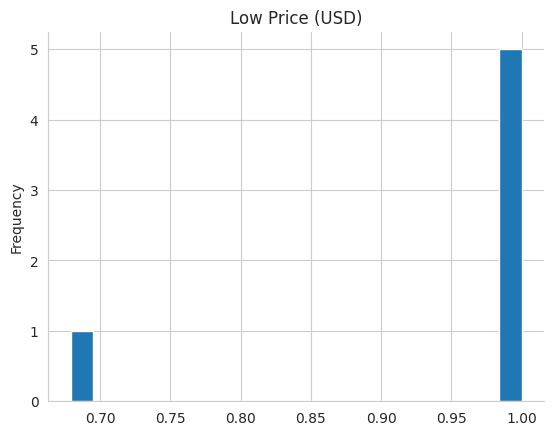

In [ ]:
from matplotlib import pyplot as plt
_df_0['Low Price (USD)'].plot(kind='hist', bins=20, title='Low Price (USD)')
plt.gca().spines[['top', 'right',]].set_visible(False)

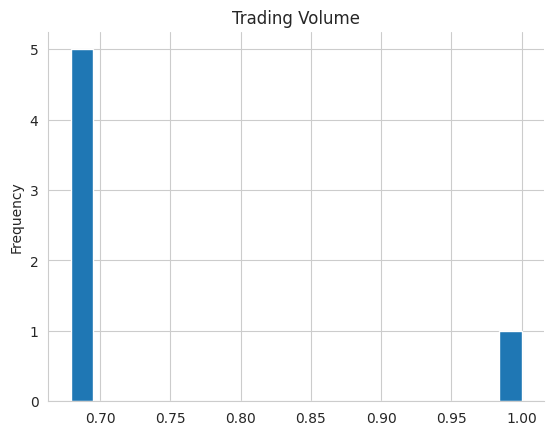

In [ ]:
from matplotlib import pyplot as plt
_df_0['Trading Volume'].plot(kind='hist', bins=20, title='Trading Volume')
plt.gca().spines[['top', 'right',]].set_visible(False)